# Clase programada

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class DijkstraAlgorithm:
    """
    Implementa el algoritmo de Dijkstra para calcular la distancia mínima y la ruta más corta entre dos vértices en un grafo.

    Args:
    - vertices (list): Una lista de vértices del grafo.
    - rutas (dict): Un diccionario de rutas donde las claves son tuplas (origen, destino) y los valores son las longitudes de las aristas.
    - inicio (str): El vértice de inicio para calcular la ruta más corta.
    - destino (str): El vértice de destino para calcular la ruta más corta.

    Métodos:
    - minimo(dict): Encuentra el vértice con la menor distancia desde el vértice inicial.
    - dijkstra(): Calcula la distancia mínima y la ruta desde el vértice inicial hasta el vértice de destino utilizando el algoritmo de Dijkstra.
    - mostrar_resultados(): Muestra los resultados del cálculo, incluyendo la distancia mínima y la ruta, y visualiza el grafo y la ruta más corta.
    - __str__(): Devuelve una representación legible del objeto DijkstraAlgorithm.
    """
    
    def __init__(self, vertices, rutas, inicio, destino):
        self.__vertices = vertices
        self.__rutas = rutas
        self.__inicio = inicio
        self.__destino = destino
        self.__distancia_minima, self.__ruta = self.dijkstra()
        self.mostrar_resultados()

    @property
    def vertices(self):
        """Getter para el atributo vertices."""
        return self.__vertices

    @vertices.setter
    def vertices(self, nuevos_vertices):
        """Setter para el atributo vertices."""
        self.__vertices = nuevos_vertices

    @property
    def rutas(self):
        """Getter para el atributo rutas."""
        return self.__rutas

    @rutas.setter
    def rutas(self, nuevas_rutas):
        """Setter para el atributo rutas."""
        self.__rutas = nuevas_rutas

    @property
    def inicio(self):
        """Getter para el atributo inicio."""
        return self.__inicio

    @inicio.setter
    def inicio(self, nuevo_inicio):
        """Setter para el atributo inicio."""
        self.__inicio = nuevo_inicio

    @property
    def destino(self):
        """Getter para el atributo destino."""
        return self.__destino

    @destino.setter
    def destino(self, nuevo_destino):
        """Setter para el atributo destino."""
        self.__destino = nuevo_destino

    @property
    def distancia_minima(self):
        """Getter para el atributo distancia_minima."""
        return self.__distancia_minima

    @property
    def ruta(self):
        """Getter para el atributo ruta."""
        return self.__ruta

    def minimo(self, dict):
        """Encuentra el vértice con la menor distancia desde el vértice inicial."""
        min_key = list(dict.keys())[0]
        for i in list(dict.keys())[1:]:
            if dict[i] < dict[min_key]:
                min_key = i
        return min_key

    def dijkstra(self):
        """Calcula la distancia mínima y la ruta entre dos vértices usando el algoritmo de Dijkstra."""
        vertices_no_explorados = {vertice: float('inf') for vertice in self.vertices}
        predecesores = {vertice: None for vertice in self.vertices}
        vertices_no_explorados[self.inicio] = 0

        while len(vertices_no_explorados) != 0:
            vertice_actual = self.minimo(vertices_no_explorados)
            if vertice_actual == self.destino:
                break
            else:
                for (origen, trayecto), tiempo in self.rutas.items():
                    if origen == vertice_actual:
                        if trayecto in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[trayecto]:
                                vertices_no_explorados[trayecto] = tiempo_tentativo
                                predecesores[trayecto] = vertice_actual
                    elif trayecto == vertice_actual:
                        if origen in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[origen]:
                                vertices_no_explorados[origen] = tiempo_tentativo
                                predecesores[origen] = vertice_actual
                del vertices_no_explorados[vertice_actual]

        # Reconstruir la ruta
        ruta = []
        vertice_actual = self.destino
        while vertice_actual is not None:
            ruta.insert(0, vertice_actual)
            vertice_actual = predecesores[vertice_actual]

        return vertices_no_explorados[self.destino], ruta

    def mostrar_resultados(self):
        """Muestra los resultados del cálculo y visualiza el grafo y la ruta más corta."""
        print(f"La distancia mínima entre {self.inicio} y {self.destino} es {self.distancia_minima}")
        print(f"La ruta es {' -> '.join(self.ruta)}")
    
        # Crear y dibujar el grafo
        G = nx.Graph()
        for (origen, trayecto), tiempo in self.rutas.items():
            G.add_edge(origen, trayecto, weight=tiempo)

        pos = nx.spring_layout(G)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=5, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

        # Dibujar la ruta seleccionando en verde el camino más corto
        edge_colors = ['black' if not (edge[0] in self.ruta and edge[1] in self.ruta and abs(self.ruta.index(edge[0]) - self.ruta.index(edge[1])) == 1) else 'green' for edge in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
    
        plt.title(f'Ruta más corta de {self.inicio} a {self.destino}')
        plt.show()

    def __str__(self):
        """Devuelve una representación legible del objeto DijkstraAlgorithm."""
        return f'DijkstraAlgorithm(inicio={self.inicio}, destino={self.destino}, distancia_minima={self.distancia_minima}, ruta={" -> ".join(self.ruta)})'

## Ejemplo de uso sencillo

La distancia mínima entre A y D es 7
La ruta es A -> C -> B -> D


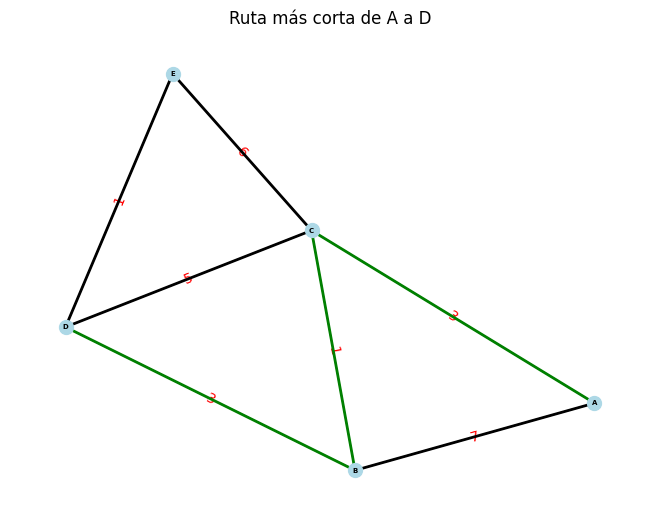

In [3]:
vertices = ['A', 'B', 'C', 'D', 'E']
rutas = {
    ('A', 'B'): 7,
    ('A', 'C'): 3,
    ('B', 'C'): 1,
    ('B', 'D'): 3,
    ('C', 'D'): 5,
    ('C', 'E'): 6,
    ('E', 'D'): 1,
}
inicio = 'A'
destino = 'D'

# Crear una instancia de la clase DijkstraAlgorithm
dijkstra_basico = DijkstraAlgorithm(vertices, rutas, inicio, destino)

# Ejemplo de uso con grafo más complejo

La distancia mínima entre A16 y A7 es 11
La ruta es A16 -> A28 -> A7


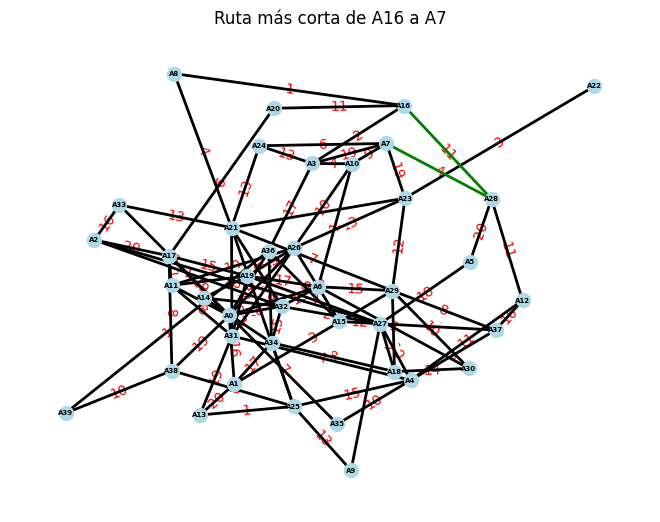

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Ejemplo de uso con vertices y rutas aleatorias usando paquete random
import random
# Generar un conjunto de 40 vértices y 100 rutas aleatorias (aristas)
vertices_random = [f'A{i}' for i in range(40)]
rutas_random = {}
for _ in range(100):  # Generar 100 rutas aleatorias
    origen_random, trayecto_random = random.sample(vertices_random, 2)
    tiempo_random = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
    rutas_random[(origen_random, trayecto_random)] = tiempo_random

inicio_random = random.choice(vertices_random)
destino_random = random.choice(vertices_random)

dijsktrar40 = DijkstraAlgorithm(vertices_random, rutas_random, inicio_random, destino_random)

# Clase programada para jueguito de tal forma que no resalte en verde el camino

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

class DijkstraAlgorithm_jueguito:
    """
    Implementa el algoritmo de Dijkstra para calcular la distancia mínima y la ruta más corta entre dos vértices en un grafo.

    Args:
    - vertices (list): Una lista de vértices del grafo.
    - rutas (dict): Un diccionario de rutas donde las claves son tuplas (origen, destino) y los valores son las longitudes de las aristas.
    - inicio (str): El vértice de inicio para calcular la ruta más corta.
    - destino (str): El vértice de destino para calcular la ruta más corta.

    Métodos:
    - minimo(dict): Encuentra el vértice con la menor distancia desde el vértice inicial.
    - dijkstra(): Calcula la distancia mínima y la ruta desde el vértice inicial hasta el vértice de destino utilizando el algoritmo de Dijkstra.
    - mostrar_resultados(): Muestra los resultados del cálculo, incluyendo la distancia mínima y la ruta, y visualiza el grafo y la ruta más corta.
    - __str__(): Devuelve una representación legible del objeto DijkstraAlgorithm.
    """
    
    def __init__(self, vertices, rutas, inicio, destino):
        self.__vertices = vertices
        self.__rutas = rutas
        self.__inicio = inicio
        self.__destino = destino
        self.__distancia_minima, self.__ruta = self.dijkstra()
        self.mostrar_resultados()

    @property
    def vertices(self):
        """Getter para el atributo vertices."""
        return self.__vertices

    @vertices.setter
    def vertices(self, nuevos_vertices):
        """Setter para el atributo vertices."""
        self.__vertices = nuevos_vertices

    @property
    def rutas(self):
        """Getter para el atributo rutas."""
        return self.__rutas

    @rutas.setter
    def rutas(self, nuevas_rutas):
        """Setter para el atributo rutas."""
        self.__rutas = nuevas_rutas

    @property
    def inicio(self):
        """Getter para el atributo inicio."""
        return self.__inicio

    @inicio.setter
    def inicio(self, nuevo_inicio):
        """Setter para el atributo inicio."""
        self.__inicio = nuevo_inicio

    @property
    def destino(self):
        """Getter para el atributo destino."""
        return self.__destino

    @destino.setter
    def destino(self, nuevo_destino):
        """Setter para el atributo destino."""
        self.__destino = nuevo_destino

    @property
    def distancia_minima(self):
        """Getter para el atributo distancia_minima."""
        return self.__distancia_minima

    @property
    def ruta(self):
        """Getter para el atributo ruta."""
        return self.__ruta

    def minimo(self, dict):
        """Encuentra el vértice con la menor distancia desde el vértice inicial."""
        min_key = list(dict.keys())[0]
        for i in list(dict.keys())[1:]:
            if dict[i] < dict[min_key]:
                min_key = i
        return min_key

    def dijkstra(self):
        """Calcula la distancia mínima y la ruta entre dos vértices usando el algoritmo de Dijkstra."""
        vertices_no_explorados = {vertice: float('inf') for vertice in self.vertices}
        predecesores = {vertice: None for vertice in self.vertices}
        vertices_no_explorados[self.inicio] = 0

        while len(vertices_no_explorados) != 0:
            vertice_actual = self.minimo(vertices_no_explorados)
            if vertice_actual == self.destino:
                break
            else:
                for (origen, trayecto), tiempo in self.rutas.items():
                    if origen == vertice_actual:
                        if trayecto in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[trayecto]:
                                vertices_no_explorados[trayecto] = tiempo_tentativo
                                predecesores[trayecto] = vertice_actual
                    elif trayecto == vertice_actual:
                        if origen in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[origen]:
                                vertices_no_explorados[origen] = tiempo_tentativo
                                predecesores[origen] = vertice_actual
                del vertices_no_explorados[vertice_actual]

        # Reconstruir la ruta
        ruta = []
        vertice_actual = self.destino
        while vertice_actual is not None:
            ruta.insert(0, vertice_actual)
            vertice_actual = predecesores[vertice_actual]

        return vertices_no_explorados[self.destino], ruta

    def mostrar_resultados(self):
        """Muestra los resultados del cálculo y visualiza el grafo y la ruta más corta."""
        print(f"La distancia mínima entre {self.inicio} y {self.destino} es {self.distancia_minima}")
        print(f"La ruta es {' -> '.join(self.ruta)}")
    
        # Crear y dibujar el grafo
        G = nx.Graph()
        for (origen, trayecto), tiempo in self.rutas.items():
            G.add_edge(origen, trayecto, weight=tiempo)

        # Mostrar grafo con todas las aristas en negro
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G, seed=42)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', alpha=0.7)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
        nx.draw_networkx_edges(G, pos, edge_color='black', width=2)
        plt.title(f'Adivinar Ruta más corta de {self.inicio} a {self.destino}', fontsize=15)
        plt.show()

        # Mostrar grafo con la ruta más corta destacada en verde
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', alpha=0.7)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
        edge_colors = ['black' if not (edge[0] in self.ruta and edge[1] in self.ruta and abs(self.ruta.index(edge[0]) - self.ruta.index(edge[1])) == 1) else 'green' for edge in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
        plt.title(f'Ruta más corta de {self.inicio} a {self.destino}', fontsize=15)
        plt.show()

    def __str__(self):
        """Devuelve una representación legible del objeto DijkstraAlgorithm."""
        return f'DijkstraAlgorithm(inicio={self.inicio}, destino={self.destino}, distancia_minima={self.distancia_minima}, ruta={" -> ".join(self.ruta)})'


## Juego 1

Distancias entre vértices para el primer jueguito:
('V10', 'V4'): 16
('V1', 'V2'): 14
('V3', 'V11'): 19
('V1', 'V16'): 7
('V13', 'V2'): 8
('V2', 'V17'): 14
('V1', 'V18'): 4
('V7', 'V18'): 2
('V18', 'V19'): 7
('V1', 'V7'): 2
('V17', 'V4'): 10
('V13', 'V4'): 18
('V3', 'V18'): 10
('V17', 'V5'): 4
('V11', 'V3'): 18
('V2', 'V18'): 2
('V19', 'V6'): 16
('V17', 'V13'): 11
('V14', 'V18'): 15
('V11', 'V9'): 8
('V5', 'V7'): 3
('V18', 'V9'): 17
('V15', 'V10'): 15
('V9', 'V2'): 4
('V16', 'V13'): 6
('V13', 'V1'): 3
('V17', 'V18'): 11
('V10', 'V11'): 20
('V15', 'V18'): 15
('V2', 'V19'): 9
('V15', 'V2'): 2
('V9', 'V18'): 15
('V9', 'V12'): 12
('V0', 'V14'): 12
('V5', 'V3'): 16
('V1', 'V6'): 10
('V4', 'V7'): 13
La distancia mínima entre V12 y V15 es 18
La ruta es V12 -> V9 -> V2 -> V15


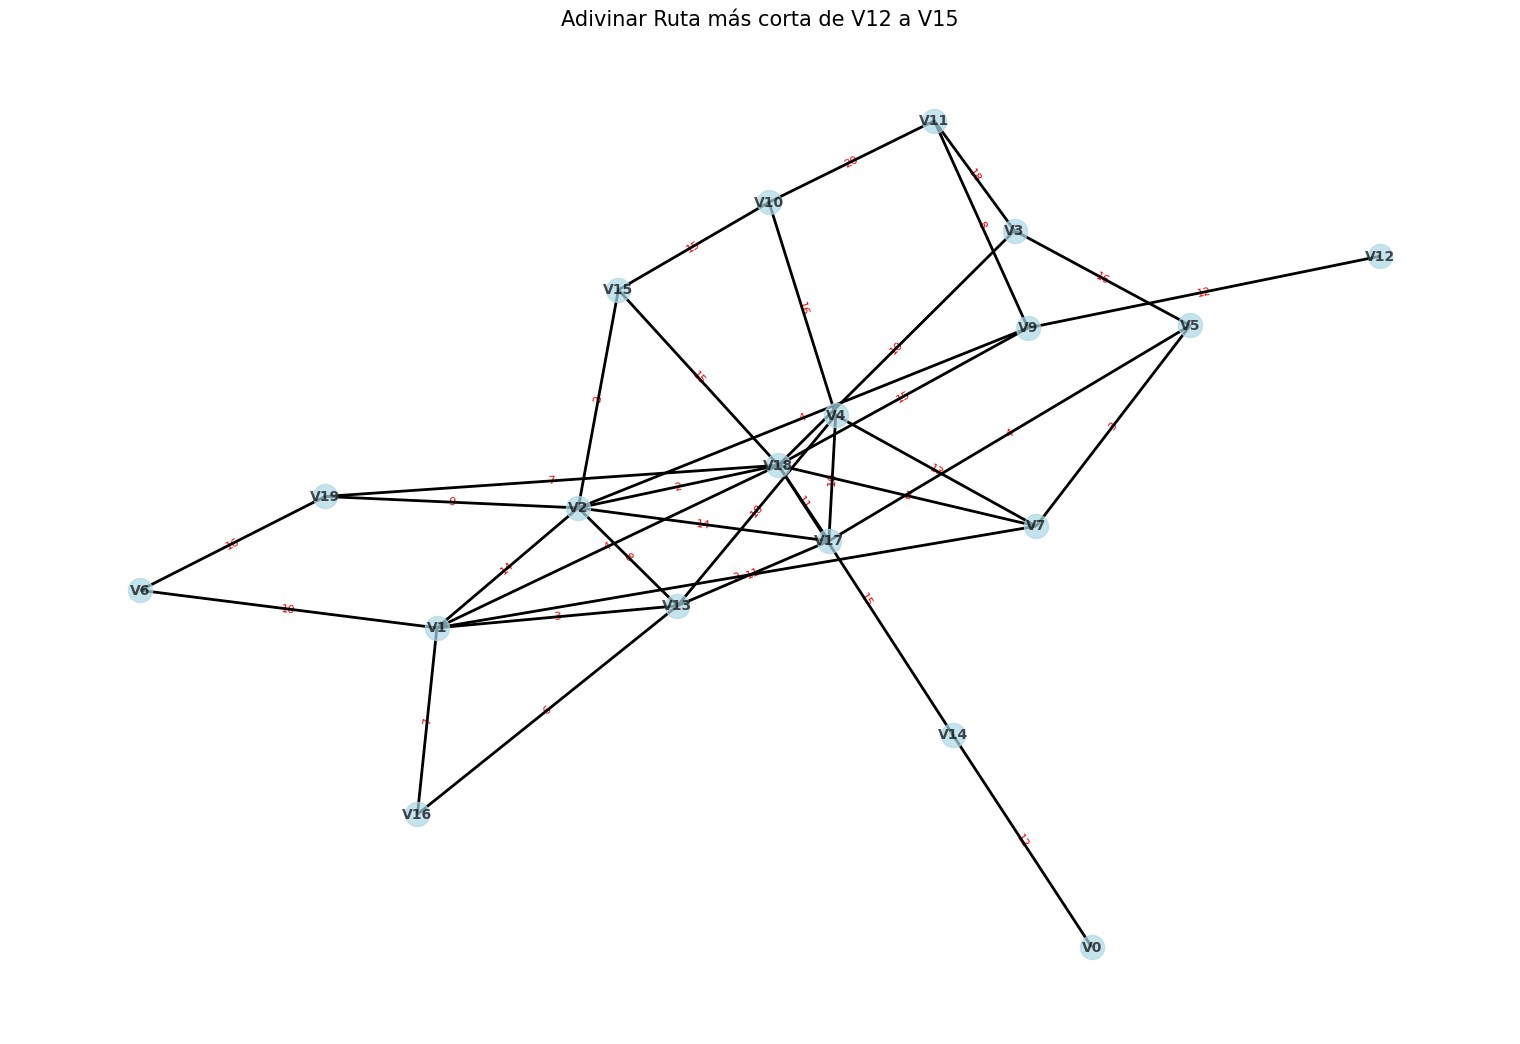

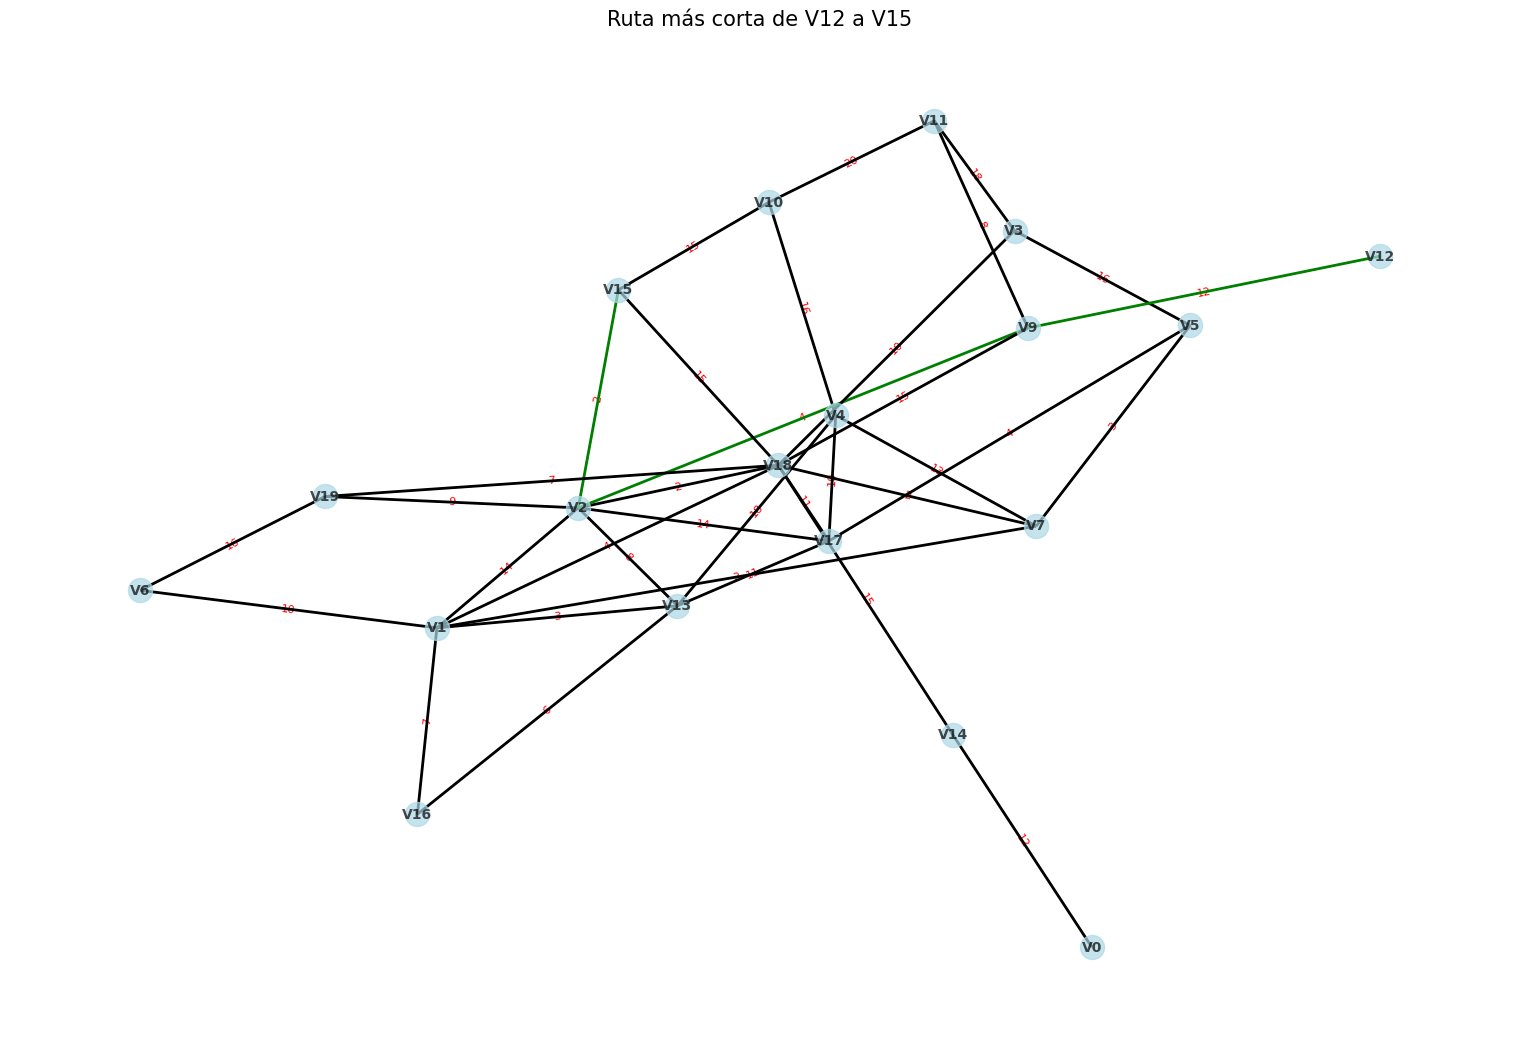

In [6]:
random.seed(7)

# Generar un conjunto de 20 vértices y 40 rutas aleatorias (aristas)
vertices_jueguito1 = [f'V{i}' for i in range(20)]
rutas_jueguito1 = {}
distancias_jueguito1 = {}  # Diccionario para almacenar las distancias/tiempos entre vértices

for _ in range(40):  # Generar rutas aleatorias
    origen_jueguito1, destino_jueguito1 = random.sample(vertices_jueguito1, 2)
    tiempo_jueguito1 = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
    rutas_jueguito1[(origen_jueguito1, destino_jueguito1)] = tiempo_jueguito1
    distancias_jueguito1[(origen_jueguito1, destino_jueguito1)] = tiempo_jueguito1

inicio_jueguito1 = random.choice(vertices_jueguito1)
destino_jueguito1 = random.choice(vertices_jueguito1)

# Mostrar las distancias generadas por si no se ve tan bien
print("Distancias entre vértices para el primer jueguito:")
for ruta, distancia in distancias_jueguito1.items():
    print(f"{ruta}: {distancia}")

dijsktrar_primer_jueguito = DijkstraAlgorithm_jueguito(vertices_jueguito1, rutas_jueguito1, inicio_jueguito1, destino_jueguito1)

## Juego 2

Distancias entre vértices para el segundo jueguito:
('V18', 'V1'): 6
('V0', 'V4'): 2
('V17', 'V1'): 4
('V14', 'V31'): 6
('V1', 'V33'): 5
('V24', 'V23'): 2
('V11', 'V3'): 15
('V32', 'V28'): 15
('V32', 'V10'): 17
('V35', 'V2'): 4
('V4', 'V6'): 2
('V5', 'V8'): 11
('V36', 'V19'): 15
('V32', 'V20'): 12
('V16', 'V15'): 4
('V17', 'V5'): 4
('V13', 'V28'): 13
('V2', 'V1'): 16
('V6', 'V27'): 4
('V10', 'V25'): 8
('V0', 'V32'): 14
('V7', 'V33'): 8
('V32', 'V7'): 13
('V17', 'V36'): 2
('V22', 'V27'): 4
('V3', 'V33'): 8
('V2', 'V13'): 6
('V34', 'V14'): 12
('V23', 'V12'): 3
('V32', 'V21'): 18
('V33', 'V16'): 19
('V24', 'V4'): 14
('V25', 'V18'): 6
('V33', 'V24'): 14
('V2', 'V9'): 13
('V8', 'V26'): 4
('V18', 'V17'): 11
('V15', 'V20'): 12
('V1', 'V28'): 20
('V8', 'V10'): 14
('V10', 'V36'): 11
('V5', 'V16'): 11
('V32', 'V25'): 2
('V2', 'V17'): 4
('V26', 'V24'): 5
('V27', 'V14'): 4
('V5', 'V33'): 19
('V36', 'V24'): 6
('V14', 'V27'): 19
('V31', 'V10'): 6
('V7', 'V11'): 3
('V23', 'V10'): 6
('V27', 'V26'): 18

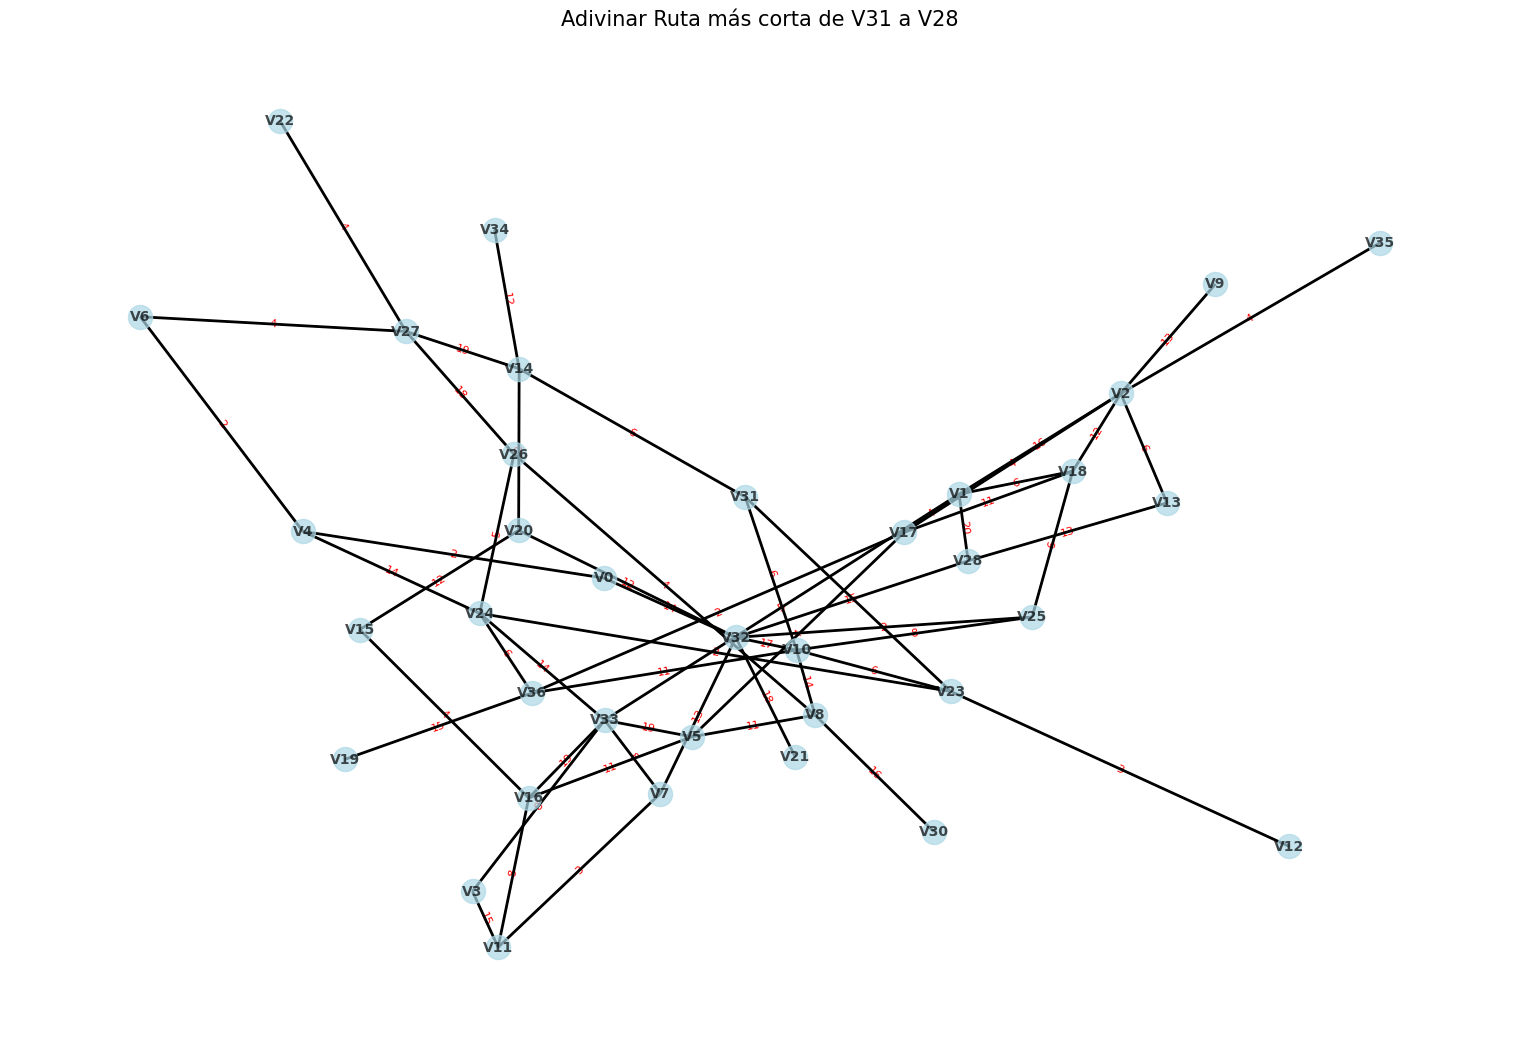

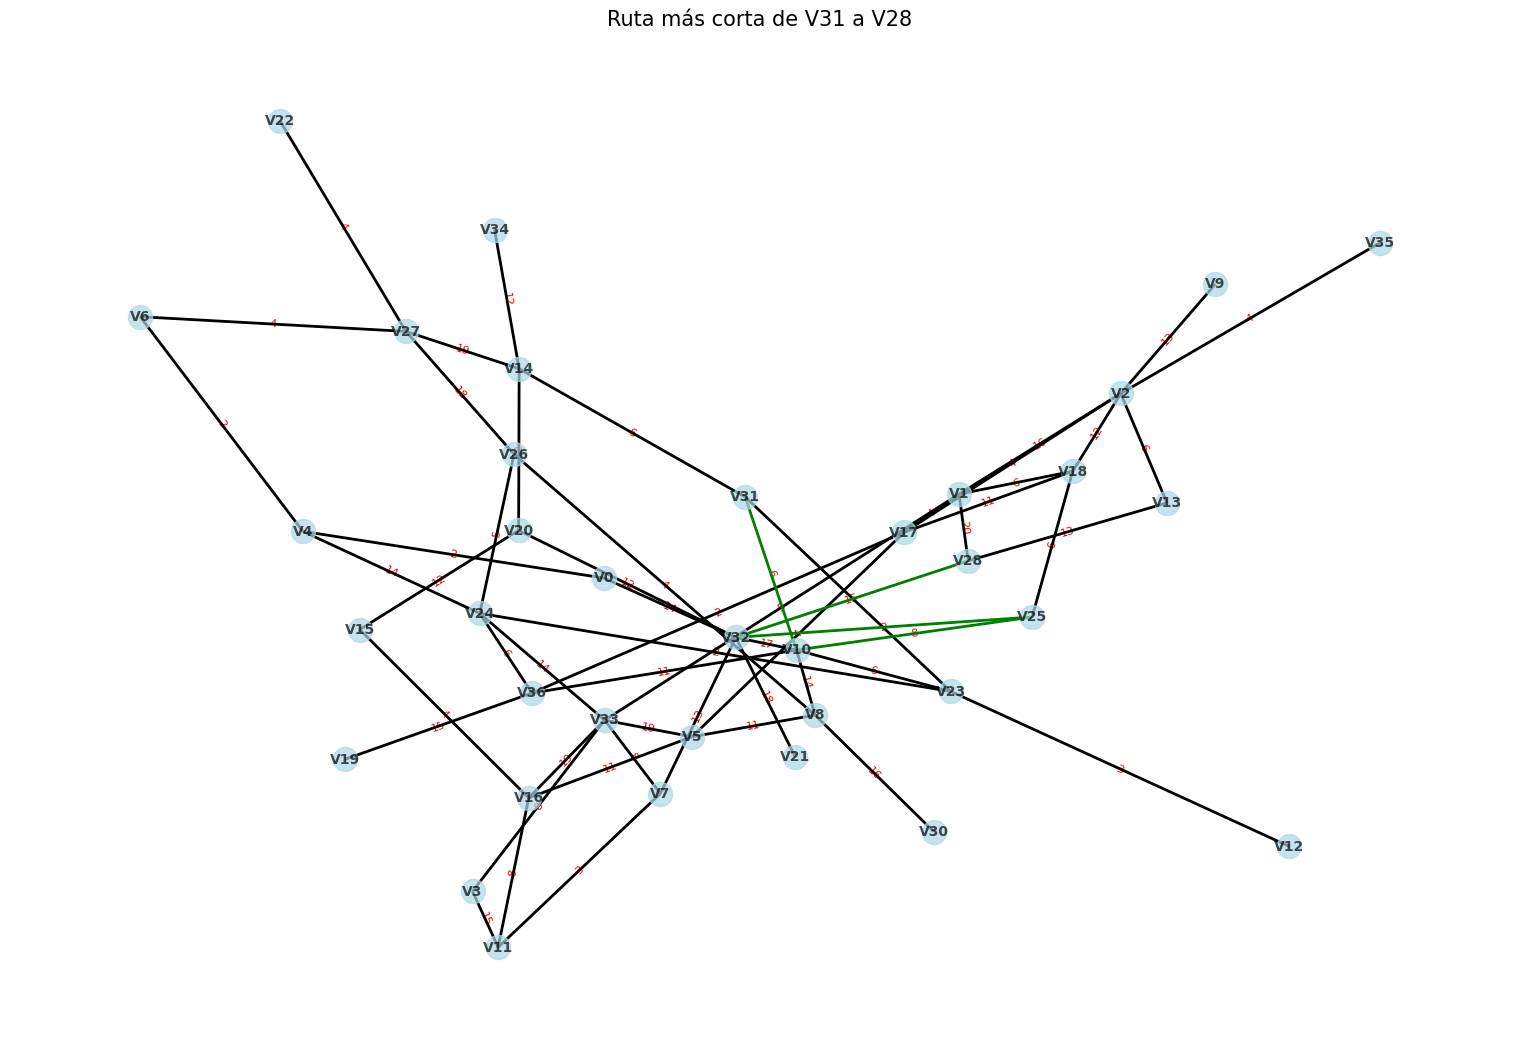

In [7]:
random.seed(123456)
vertices_jueguito2 = [f'V{i}' for i in range(37)]
rutas_jueguito2 = {}
distancias_jueguito2 = {}  # Diccionario para almacenar las distancias/tiempos entre vértices

for _ in range(60): 
    origen_jueguito2, destino_jueguito2 = random.sample(vertices_jueguito2, 2)
    tiempo_jueguito2 = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
    rutas_jueguito2[(origen_jueguito2, destino_jueguito2)] = tiempo_jueguito2
    distancias_jueguito2[(origen_jueguito2, destino_jueguito2)] = tiempo_jueguito2

inicio_jueguito2 = random.choice(vertices_jueguito2)
destino_jueguito2 = random.choice(vertices_jueguito2)

# Mostrar las distancias generadas por si no se ve tan bien
print("Distancias entre vértices para el segundo jueguito:")
for ruta, distancia in distancias_jueguito2.items():
    print(f"{ruta}: {distancia}")

dijsktrar_segundo_jueguito = DijkstraAlgorithm_jueguito(vertices_jueguito2, rutas_jueguito2, inicio_jueguito2, destino_jueguito2)

## Juego 3

Distancias entre vértices para el tercero jueguito:
('V6', 'V34'): 3
('V52', 'V34'): 4
('V4', 'V48'): 18
('V71', 'V42'): 11
('V6', 'V20'): 5
('V43', 'V71'): 11
('V31', 'V20'): 1
('V55', 'V11'): 20
('V48', 'V8'): 1
('V40', 'V57'): 4
('V5', 'V11'): 5
('V16', 'V2'): 10
('V55', 'V61'): 9
('V60', 'V4'): 18
('V43', 'V66'): 16
('V26', 'V67'): 19
('V40', 'V1'): 13
('V65', 'V55'): 18
('V62', 'V66'): 14
('V47', 'V65'): 2
('V23', 'V10'): 16
('V33', 'V21'): 11
('V43', 'V70'): 13
('V9', 'V58'): 13
('V43', 'V2'): 7
('V11', 'V46'): 1
('V45', 'V29'): 13
('V68', 'V64'): 2
('V36', 'V63'): 8
('V69', 'V61'): 6
('V19', 'V68'): 15
('V48', 'V59'): 2
('V1', 'V17'): 15
('V24', 'V2'): 9
('V45', 'V34'): 14
('V53', 'V0'): 4
('V8', 'V65'): 12
('V11', 'V10'): 14
('V1', 'V68'): 13
('V9', 'V69'): 13
('V3', 'V41'): 9
('V42', 'V53'): 12
('V3', 'V20'): 14
('V8', 'V18'): 12
('V30', 'V10'): 2
('V66', 'V49'): 18
('V39', 'V18'): 10
('V49', 'V47'): 5
('V68', 'V43'): 17
('V15', 'V21'): 19
('V49', 'V55'): 2
('V17', 'V58'): 1
(

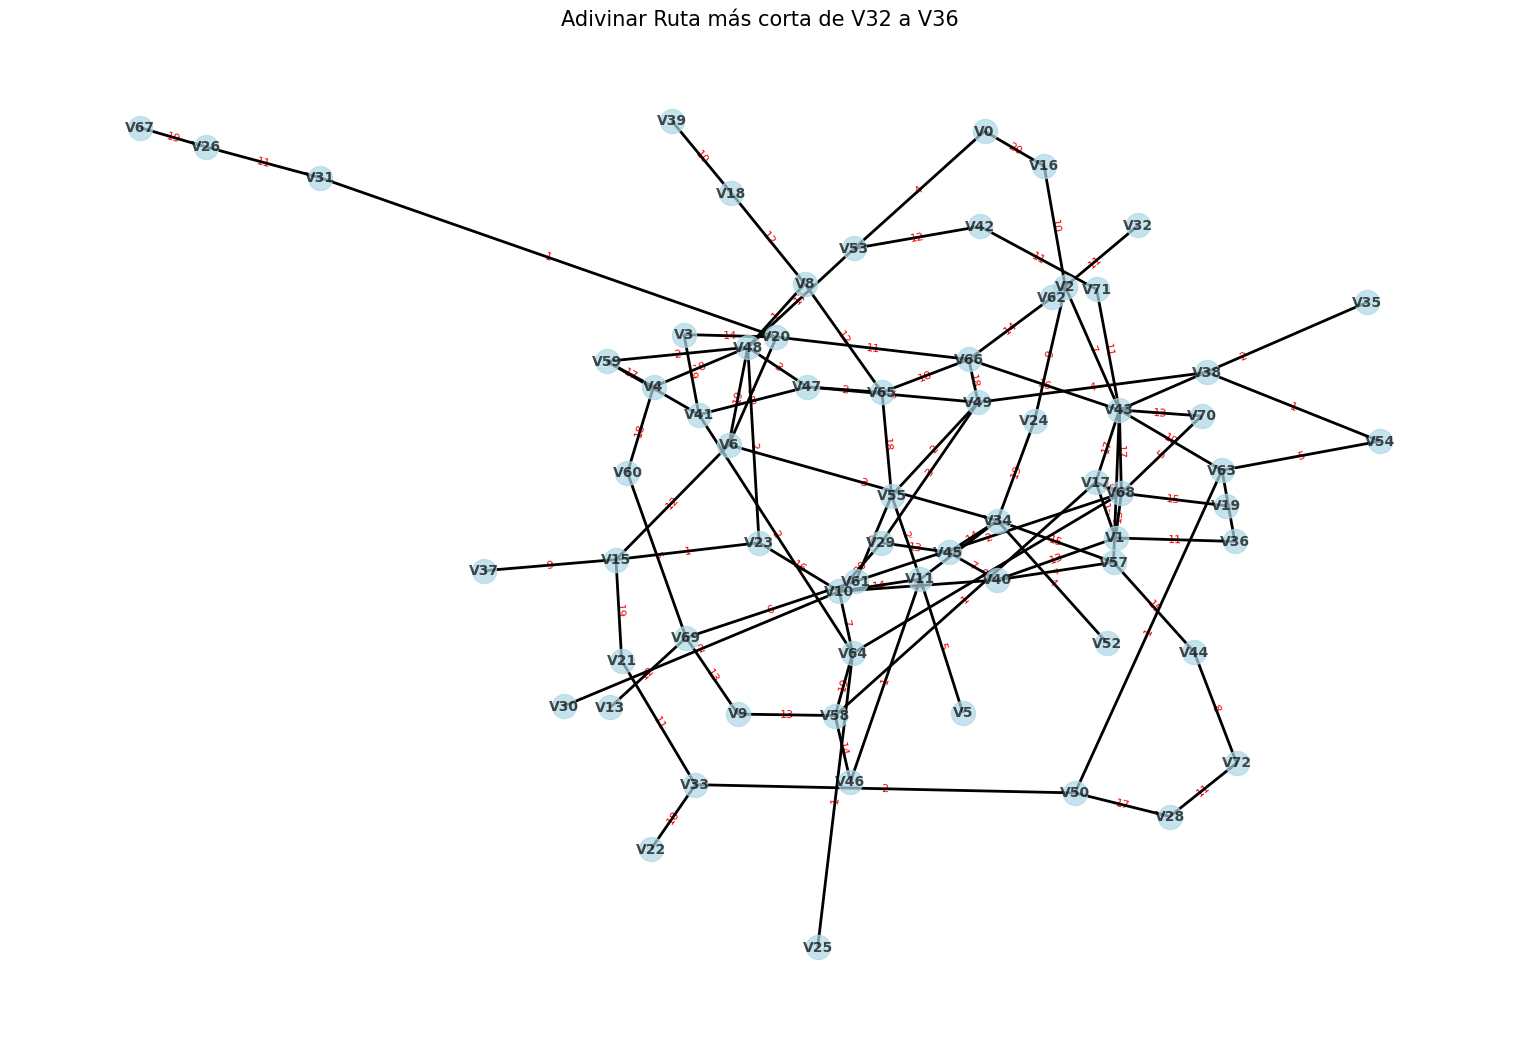

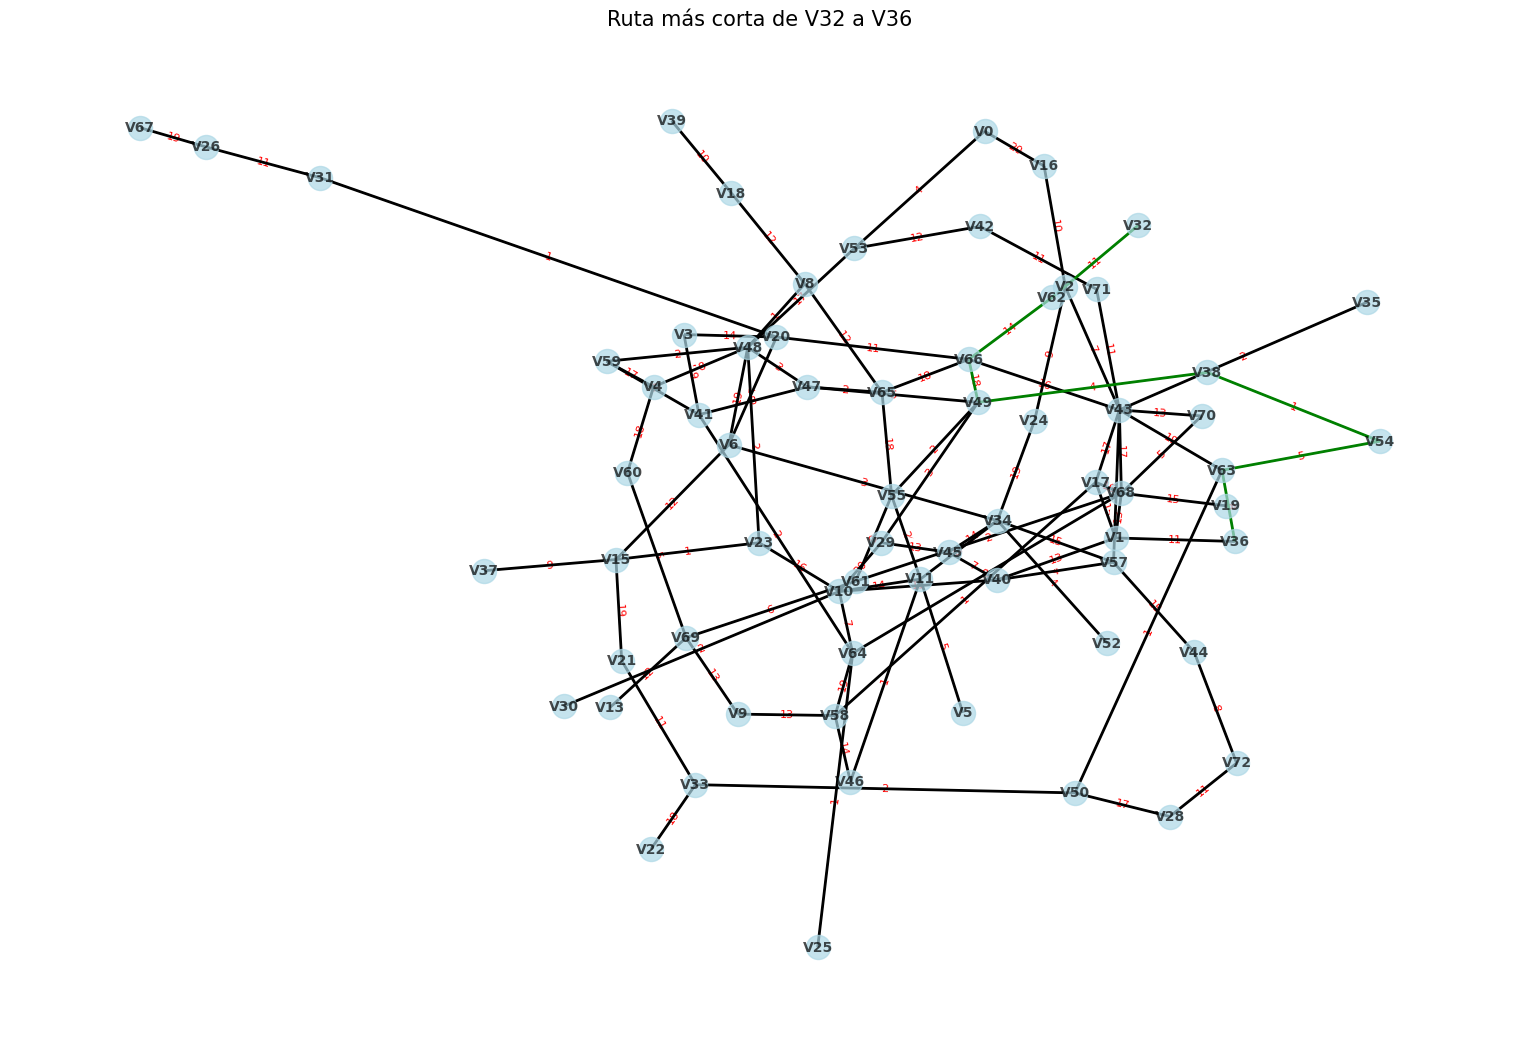

In [8]:
random.seed(123)
vertices_jueguito3 = [f'V{i}' for i in range(73)]
rutas_jueguito3 = {}
distancias_jueguito3 = {}  # Diccionario para almacenar las distancias/tiempos entre vértices

for _ in range(100):  
    origen_jueguito3, destino_jueguito3 = random.sample(vertices_jueguito3, 2)
    tiempo_jueguito3 = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
    rutas_jueguito3[(origen_jueguito3, destino_jueguito3)] = tiempo_jueguito3
    distancias_jueguito3[(origen_jueguito3, destino_jueguito3)] = tiempo_jueguito3

inicio_jueguito3 = random.choice(vertices_jueguito3)
destino_jueguito3 = random.choice(vertices_jueguito3)

# Mostrar las distancias generadas por si no se ve tan bien
print("Distancias entre vértices para el tercero jueguito:")
for ruta, distancia in distancias_jueguito3.items():
    print(f"{ruta}: {distancia}")

dijsktrar_tercero_jueguito = DijkstraAlgorithm_jueguito(vertices_jueguito3, rutas_jueguito3, inicio_jueguito3, destino_jueguito3)


## Juego 4

Distancias entre vértices para el cuarto jueguito:
('V25', 'V58'): 9
('V131', 'V130'): 3
('V85', 'V31'): 5
('V89', 'V6'): 16
('V10', 'V94'): 8
('V123', 'V138'): 2
('V117', 'V56'): 18
('V32', 'V65'): 3
('V95', 'V9'): 14
('V70', 'V143'): 10
('V97', 'V47'): 2
('V32', 'V62'): 7
('V138', 'V103'): 16
('V44', 'V133'): 19
('V116', 'V15'): 15
('V56', 'V37'): 4
('V112', 'V36'): 13
('V60', 'V53'): 17
('V71', 'V55'): 3
('V101', 'V58'): 20
('V118', 'V10'): 11
('V103', 'V104'): 9
('V95', 'V67'): 10
('V51', 'V80'): 14
('V28', 'V139'): 11
('V26', 'V48'): 16
('V26', 'V90'): 8
('V72', 'V132'): 20
('V101', 'V15'): 7
('V70', 'V57'): 1
('V125', 'V85'): 13
('V85', 'V41'): 16
('V25', 'V118'): 8
('V36', 'V51'): 5
('V27', 'V33'): 5
('V115', 'V72'): 6
('V63', 'V45'): 13
('V115', 'V105'): 8
('V123', 'V122'): 15
('V108', 'V74'): 15
('V74', 'V56'): 19
('V99', 'V48'): 8
('V68', 'V133'): 15
('V8', 'V72'): 15
('V79', 'V52'): 5
('V81', 'V64'): 8
('V36', 'V99'): 3
('V53', 'V101'): 7
('V51', 'V140'): 8
('V90', 'V145'): 

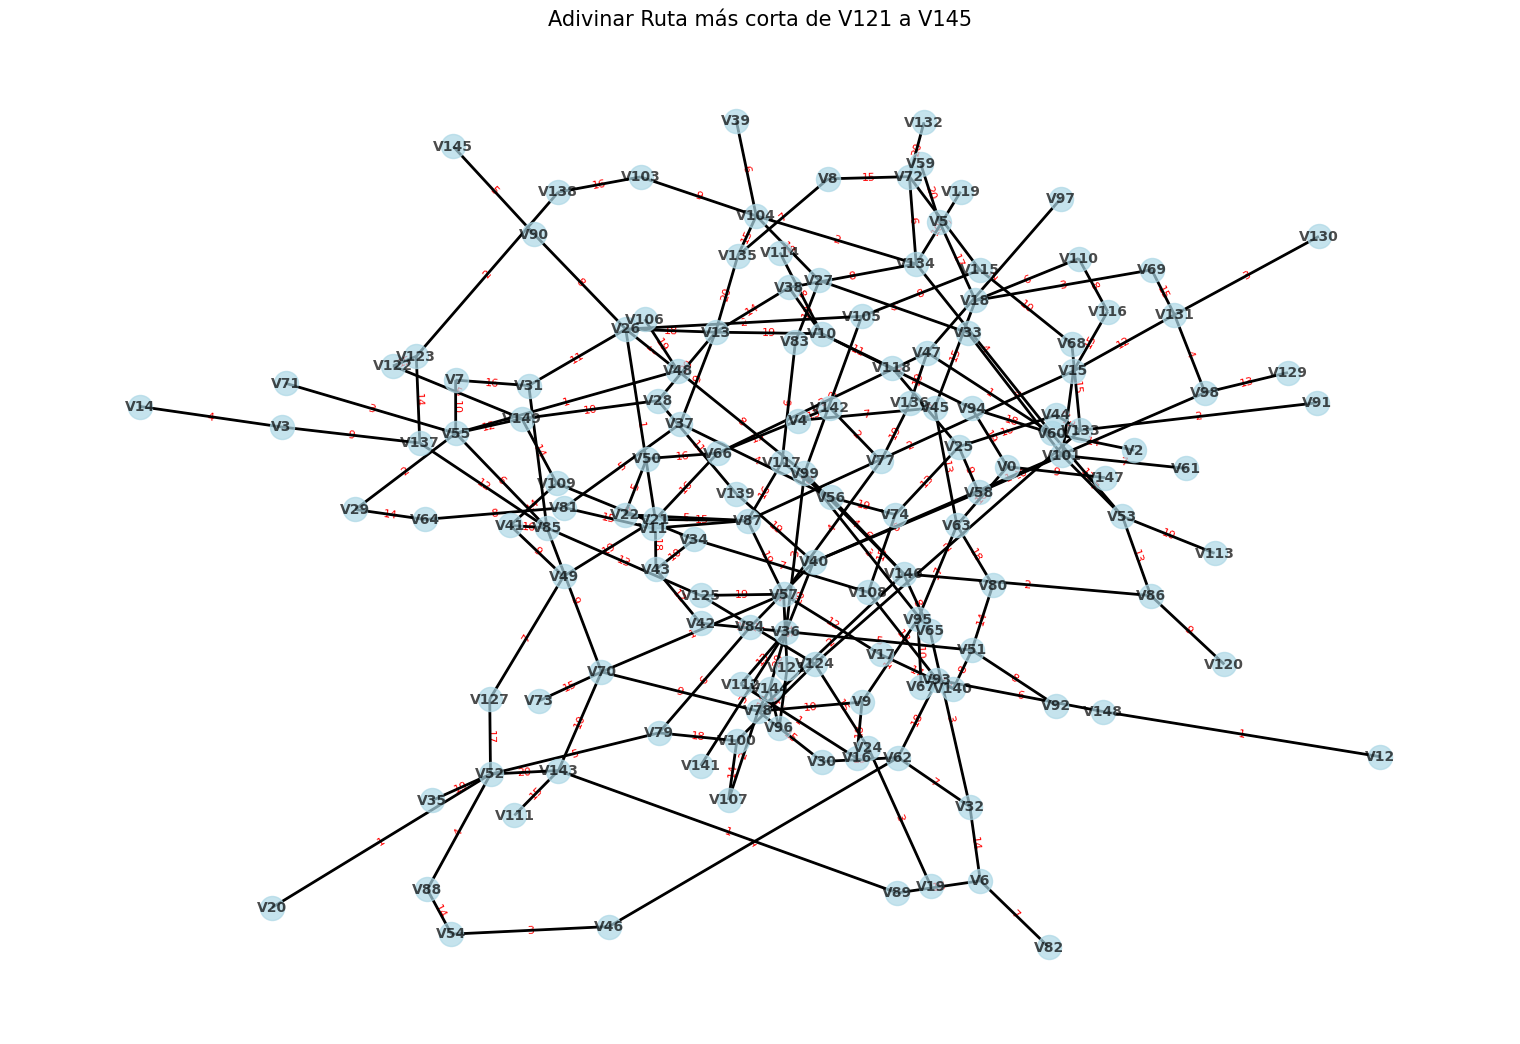

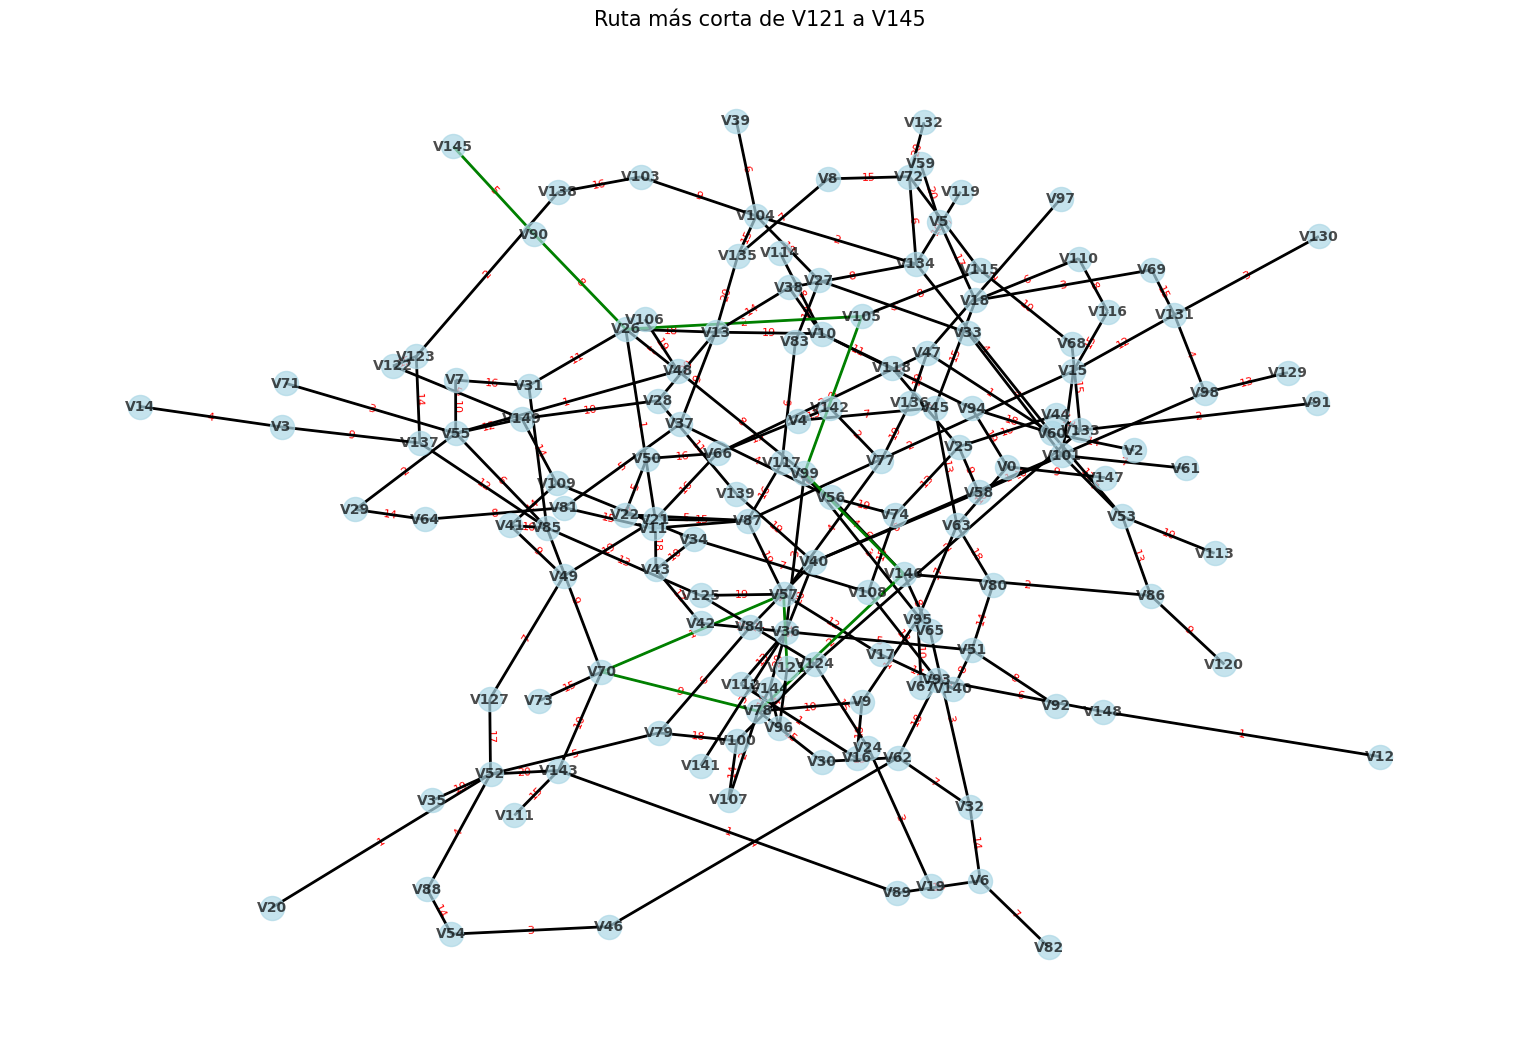

In [9]:
random.seed(12345678)
vertices_jueguito4 = [f'V{i}' for i in range(150)]
rutas_jueguito4 = {}
distancias_jueguito4 = {}  # Diccionario para almacenar las distancias/tiempos entre vértices

for _ in range(200):  
    origen_jueguito4, destino_jueguito4 = random.sample(vertices_jueguito4, 2)
    tiempo_jueguito4 = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
    rutas_jueguito4[(origen_jueguito4, destino_jueguito4)] = tiempo_jueguito4
    distancias_jueguito4[(origen_jueguito4, destino_jueguito4)] = tiempo_jueguito4

inicio_jueguito4 = random.choice(vertices_jueguito4)
destino_jueguito4 = random.choice(vertices_jueguito4)

# Mostrar las distancias generadas por si no se ve tan bien
print("Distancias entre vértices para el cuarto jueguito:")
for ruta, distancia in distancias_jueguito4.items():
    print(f"{ruta}: {distancia}")

dijsktrar_cuarto_jueguito = DijkstraAlgorithm_jueguito(vertices_jueguito4, rutas_jueguito4, inicio_jueguito4, destino_jueguito4)

# Muestra de la función sin graficar pues en graficar es en lo que más se tarda

In [17]:
import time
class DijkstraAlgorithm_sin_graficar:
    """
    Implementa el algoritmo de Dijkstra para calcular la distancia mínima y la ruta más corta entre dos vértices en un grafo.

    Args:
    - vertices (list): Una lista de vértices del grafo.
    - rutas (dict): Un diccionario de rutas donde las claves son tuplas (origen, destino) y los valores son las longitudes de las aristas.
    - inicio (str): El vértice de inicio para calcular la ruta más corta.
    - destino (str): El vértice de destino para calcular la ruta más corta.

    Métodos:
    - minimo(dict): Encuentra el vértice con la menor distancia desde el vértice inicial.
    - dijkstra(): Calcula la distancia mínima y la ruta desde el vértice inicial hasta el vértice de destino utilizando el algoritmo de Dijkstra.
    - mostrar_resultados(): Muestra los resultados del cálculo, incluyendo la distancia mínima y la ruta.
    - __str__(): Devuelve una representación legible del objeto DijkstraAlgorithm.
    """
    
    def __init__(self, vertices, rutas, inicio, destino):
        self.__vertices = vertices
        self.__rutas = rutas
        self.__inicio = inicio
        self.__destino = destino
        self.__distancia_minima, self.__ruta = self.dijkstra()
        self.mostrar_resultados()

    @property
    def vertices(self):
        """Getter para el atributo vertices."""
        return self.__vertices

    @vertices.setter
    def vertices(self, nuevos_vertices):
        """Setter para el atributo vertices."""
        self.__vertices = nuevos_vertices

    @property
    def rutas(self):
        """Getter para el atributo rutas."""
        return self.__rutas

    @rutas.setter
    def rutas(self, nuevas_rutas):
        """Setter para el atributo rutas."""
        self.__rutas = nuevas_rutas

    @property
    def inicio(self):
        """Getter para el atributo inicio."""
        return self.__inicio

    @inicio.setter
    def inicio(self, nuevo_inicio):
        """Setter para el atributo inicio."""
        self.__inicio = nuevo_inicio

    @property
    def destino(self):
        """Getter para el atributo destino."""
        return self.__destino

    @destino.setter
    def destino(self, nuevo_destino):
        """Setter para el atributo destino."""
        self.__destino = nuevo_destino

    @property
    def distancia_minima(self):
        """Getter para el atributo distancia_minima."""
        return self.__distancia_minima

    @property
    def ruta(self):
        """Getter para el atributo ruta."""
        return self.__ruta

    def minimo(self, dict):
        """Encuentra el vértice con la menor distancia desde el vértice inicial."""
        min_key = list(dict.keys())[0]
        for i in list(dict.keys())[1:]:
            if dict[i] < dict[min_key]:
                min_key = i
        return min_key

    def dijkstra(self):
        """Calcula la distancia mínima y la ruta entre dos vértices usando el algoritmo de Dijkstra."""
        vertices_no_explorados = {vertice: float('inf') for vertice in self.vertices}
        predecesores = {vertice: None for vertice in self.vertices}
        vertices_no_explorados[self.inicio] = 0

        while len(vertices_no_explorados) != 0:
            vertice_actual = self.minimo(vertices_no_explorados)
            if vertice_actual == self.destino:
                break
            else:
                for (origen, trayecto), tiempo in self.rutas.items():
                    if origen == vertice_actual:
                        if trayecto in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[trayecto]:
                                vertices_no_explorados[trayecto] = tiempo_tentativo
                                predecesores[trayecto] = vertice_actual
                    elif trayecto == vertice_actual:
                        if origen in vertices_no_explorados:
                            tiempo_tentativo = vertices_no_explorados[vertice_actual] + tiempo
                            if tiempo_tentativo < vertices_no_explorados[origen]:
                                vertices_no_explorados[origen] = tiempo_tentativo
                                predecesores[origen] = vertice_actual
                del vertices_no_explorados[vertice_actual]

        # Reconstruir la ruta
        ruta = []
        vertice_actual = self.destino
        while vertice_actual is not None:
            ruta.insert(0, vertice_actual)
            vertice_actual = predecesores[vertice_actual]

        return vertices_no_explorados[self.destino], ruta

    def mostrar_resultados(self):
        """Muestra los resultados del cálculo."""
        print(f"La distancia mínima entre {self.inicio} y {self.destino} es {self.distancia_minima}")
        print(f"La ruta es {' -> '.join(self.ruta)}")

    def __str__(self):
        """Devuelve una representación legible del objeto DijkstraAlgorithm."""
        return f'DijkstraAlgorithm(inicio={self.inicio}, destino={self.destino}, distancia_minima={self.distancia_minima}, ruta={" -> ".join(self.ruta)})'







# Medir el tiempo de ejecución promedio para diferentes rutas
tiempos = []
for _ in range(20):
    # Generar un conjunto de 2500 vértices y 5000 rutas aleatorias (aristas)
    vertices_ = [f'V{i}' for i in range(2500)]
    rutas_ = {}
    for _ in range(5000): 
        origen_, destino_ = random.sample(vertices_, 2)
        tiempo_ = random.randint(1, 20)  # Longitud aleatoria entre 1 y 20
        rutas_[(origen_, destino_)] = tiempo_

    inicio_ = random.choice(vertices_)
    destino_ = random.choice(vertices_)

    start_time = time.time()
    dijkstra_primer_jueguito = DijkstraAlgorithm_sin_graficar(vertices_, rutas_, inicio_, destino_)
    end_time = time.time()
    tiempos.append(end_time - start_time)

tiempo_promedio = sum(tiempos) / len(tiempos)
print(f"Tiempo promedio de ejecución: {tiempo_promedio:.4f} segundos")

La distancia mínima entre V2087 y V2263 es 41
La ruta es V2087 -> V1934 -> V1731 -> V852 -> V1698 -> V272 -> V1178 -> V2263
La distancia mínima entre V435 y V1451 es 27
La ruta es V435 -> V284 -> V2409 -> V2460 -> V1451
La distancia mínima entre V1393 y V1784 es 46
La ruta es V1393 -> V1832 -> V1971 -> V236 -> V619 -> V405 -> V1922 -> V1556 -> V195 -> V1784
La distancia mínima entre V1936 y V1225 es 67
La ruta es V1936 -> V1265 -> V1535 -> V2176 -> V881 -> V766 -> V1333 -> V1743 -> V927 -> V1225
La distancia mínima entre V1688 y V635 es 48
La ruta es V1688 -> V916 -> V1455 -> V896 -> V2065 -> V2252 -> V635
La distancia mínima entre V1366 y V85 es 49
La ruta es V1366 -> V51 -> V1183 -> V1389 -> V211 -> V1640 -> V1707 -> V1852 -> V866 -> V85
La distancia mínima entre V2183 y V226 es 51
La ruta es V2183 -> V2427 -> V1471 -> V1763 -> V14 -> V961 -> V1850 -> V297 -> V355 -> V1741 -> V226
La distancia mínima entre V1303 y V316 es 61
La ruta es V1303 -> V1861 -> V134 -> V1911 -> V1943 -> V123

# Implementación con data de Kaggle (https://www.kaggle.com/datasets/arezaei81/flights)

In [11]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("D:/Descargas/flights.csv")

# Se eliminaron el resto de observaciones y se dejaron solo origin, dest, distance. Para crear una tabla resumen con vuelos unicos promediando distance

In [13]:
cols_mantener = ['origin', 'dest', 'distance']
data = data[cols_mantener]
vuelos_unicos = data.groupby(['origin', 'dest'], as_index=False).mean()
vuelos_unicos

,origin,dest,distance
0,EWR,ALB,143.0
1,EWR,ANC,3370.0
2,EWR,ATL,746.0
3,EWR,AUS,1504.0
4,EWR,AVL,583.0
...,...,...,...
219,LGA,SYR,198.0
220,LGA,TPA,1010.0
221,LGA,TVC,655.0
222,LGA,TYS,647.0


In [14]:
# Convertir el DataFrame en un diccionario de rutas
vuelos = {(row['origin'], row['dest']): row['distance'] for _, row in vuelos_unicos.iterrows()}

# Vertices unicos
aeropuertos = list(set(vuelos_unicos['origin']).union(set(vuelos_unicos['dest'])))

In [15]:
vuelos

{('EWR', 'ALB'): 143.0,
 ('EWR', 'ANC'): 3370.0,
 ('EWR', 'ATL'): 746.0,
 ('EWR', 'AUS'): 1504.0,
 ('EWR', 'AVL'): 583.0,
 ('EWR', 'BDL'): 116.0,
 ('EWR', 'BNA'): 748.0,
 ('EWR', 'BOS'): 200.0,
 ('EWR', 'BQN'): 1585.0,
 ('EWR', 'BTV'): 266.0,
 ('EWR', 'BUF'): 282.0,
 ('EWR', 'BWI'): 169.0,
 ('EWR', 'BZN'): 1882.0,
 ('EWR', 'CAE'): 602.0,
 ('EWR', 'CHS'): 628.0,
 ('EWR', 'CLE'): 404.0,
 ('EWR', 'CLT'): 529.0,
 ('EWR', 'CMH'): 463.0,
 ('EWR', 'CVG'): 569.0,
 ('EWR', 'DAY'): 533.0,
 ('EWR', 'DCA'): 199.0,
 ('EWR', 'DEN'): 1605.0,
 ('EWR', 'DFW'): 1372.0,
 ('EWR', 'DSM'): 1017.0,
 ('EWR', 'DTW'): 488.0,
 ('EWR', 'EGE'): 1725.5363636363636,
 ('EWR', 'FLL'): 1065.0,
 ('EWR', 'GRR'): 605.0,
 ('EWR', 'GSO'): 445.0,
 ('EWR', 'GSP'): 594.0,
 ('EWR', 'HDN'): 1728.0,
 ('EWR', 'HNL'): 4963.0,
 ('EWR', 'HOU'): 1411.0,
 ('EWR', 'IAD'): 212.0,
 ('EWR', 'IAH'): 1400.0,
 ('EWR', 'IND'): 645.0,
 ('EWR', 'JAC'): 1874.0,
 ('EWR', 'JAX'): 820.0,
 ('EWR', 'LAS'): 2227.0,
 ('EWR', 'LAX'): 2454.0,
 ('EWR', 'LG

In [16]:
# Crear una instancia de la clase DijkstraAlgorithm
dijkstra_vuelos = DijkstraAlgorithm_sin_graficar(aeropuertos, vuelos, 'SBN', 'OMA')

La distancia mínima entre SBN y OMA es 1771.0
La ruta es SBN -> EWR -> OMA
